In [109]:
import numpy as np
from utils import display_np_arrays_as_images
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
display_np_arrays_as_images()

In [110]:
ims = np.load('./test_images.npy', allow_pickle=False)
print(ims.shape)
print(ims.dtype)

(6, 96, 96, 3)
float64


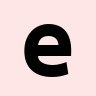

In [111]:
ims[0]

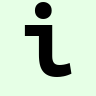

In [112]:
ims[1]

In [113]:
from einops import repeat, reduce, rearrange

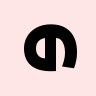

In [114]:
rearrange(ims[0], "h w c -> w h c")

# Decomposition

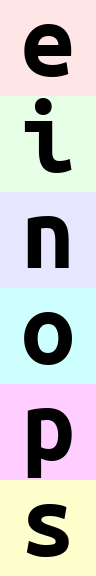

In [115]:
rearrange(ims, "b h w c -> (b h) w c")

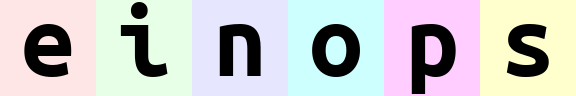

In [116]:
rearrange(ims, 'b h w c -> h (b w) c')

In [117]:
rearrange(ims, 'b h w c -> h (b w) c').shape

(96, 576, 3)

In [118]:
rearrange(ims, 'b h w c -> (b h w c)').shape

(165888,)

# Composition

In [119]:
rearrange(ims, '(b1 b2) h w c -> b1 b2 h w c ', b1=2).shape

(2, 3, 96, 96, 3)

# Decomp and comp

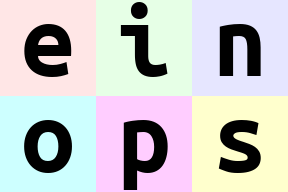

In [120]:
rearrange(ims, '(b1 b2) h w c -> (b1 h) (b2 w) c ', b1=2)

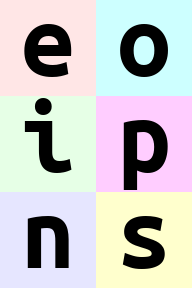

In [121]:
rearrange(ims, '(b1 b2) h w c -> (b2 h) (b1 w) c ', b1=2)

In [122]:
ims[0].shape

(96, 96, 3)

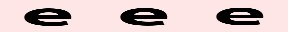

In [123]:
rearrange(ims[0], "(h1 h2) w c -> h1 (h2 w) c", h1=32)

In [124]:
print(rearrange(ims[0], "(h1 h2) w c -> h1 (h2 w) c", h1=32).shape)

(32, 288, 3)


### Understanding duplication

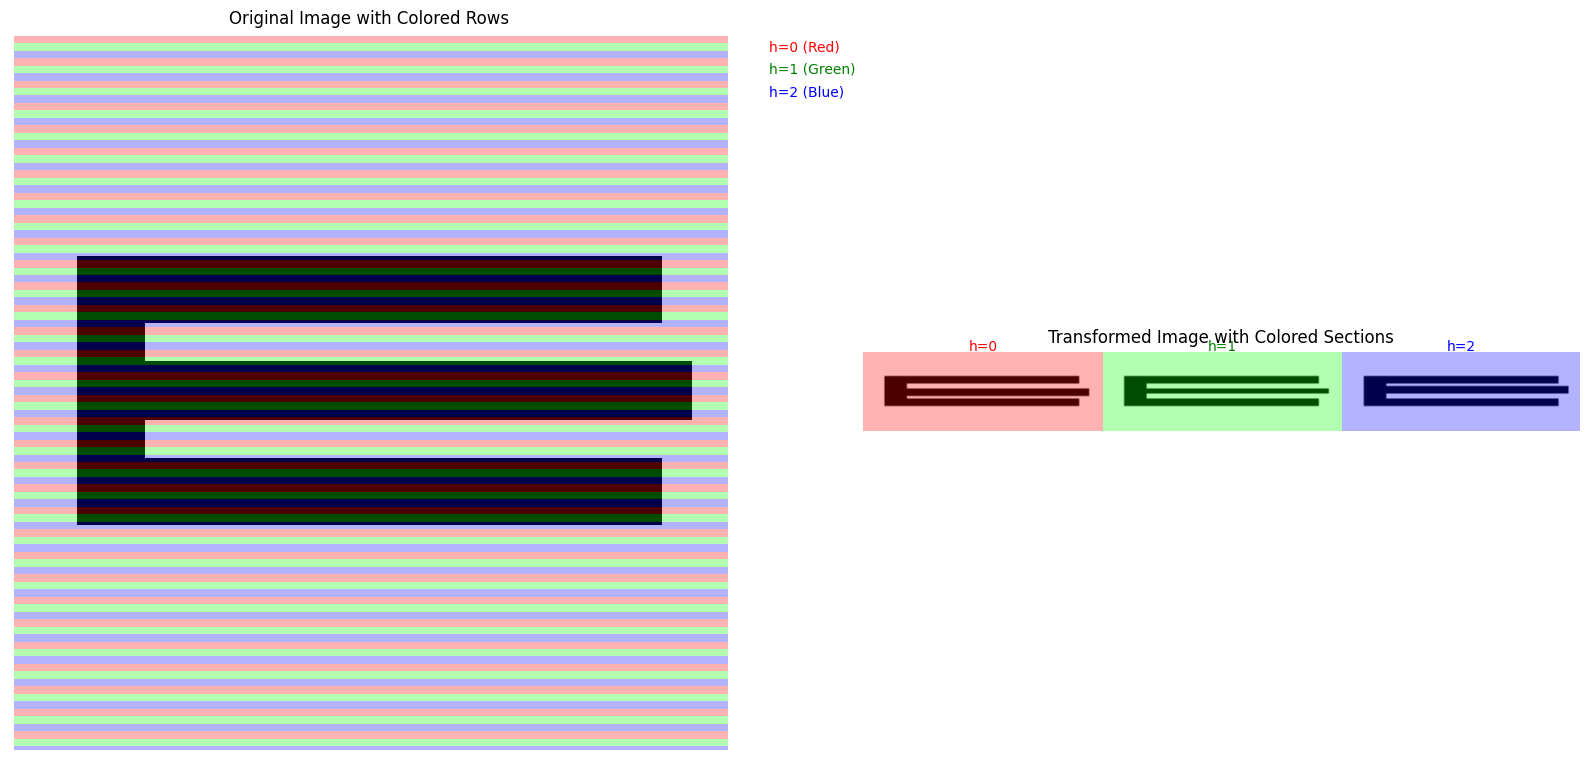

In [125]:
# Create a synthetic image of a letter "e"
def create_letter_e_image(height, width):
    img = np.ones((height, width, 3), dtype=np.uint8) * 255  # White background
    # Draw the letter "e" using rectangles (black color)
    thickness = height // 10
    center = height // 2
    # Horizontal lines
    img[center - thickness * 2:center - thickness, thickness:-thickness] = 0  # Top bar
    img[center - thickness // 2:center + thickness // 2, thickness:-thickness // 2] = 0  # Middle bar
    img[center + thickness:center + thickness * 2, thickness:-thickness] = 0  # Bottom bar
    # Vertical line
    img[center - thickness * 2:center + thickness * 2, thickness:thickness * 2] = 0  # Vertical bar
    return img

# Parameters
original_height = 96
original_width = 96
h1 = 32  # Number of vertical slices
h2 = original_height // h1  # Height of each strip (should be 3)

# Create the original image
original_image = create_letter_e_image(original_height, original_width)

# Step 1: Reshape the image into (h1, h2, w, c)
reshaped = original_image.reshape(h1, h2, original_width, 3)

# Step 2: Rearrange each strip by flattening the h2 and w dimensions
rearranged_strips = []
for i in range(h1):
    strip = reshaped[i]  # Shape: (h2, w, 3)
    # Flatten h2 and w dimensions
    rearranged_strip = strip.reshape(1, h2 * original_width, 3)
    rearranged_strips.append(rearranged_strip)

# Stack the rearranged strips vertically to form the final image
final_image = np.vstack(rearranged_strips)  # Shape: (h1, h2 * w, 3)

# Visualization
# Create colors for h=0, h=1, h=2
row_colors = [(1, 0, 0, 0.3),  # Red with transparency
              (0, 1, 0, 0.3),  # Green with transparency
              (0, 0, 1, 0.3)]  # Blue with transparency

# Visualize the mapping
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Original Image with Row Colors
ax[0].imshow(original_image)
ax[0].set_title('Original Image with Colored Rows')
ax[0].axis('off')

# Overlay colors on the original image
for i in range(h1):
    y_start = i * h2
    for j in range(h2):
        rect = Rectangle((0, y_start + j), original_width, 1,
                         linewidth=0, edgecolor=None,
                         facecolor=row_colors[j],
                         transform=ax[0].transData)
        ax[0].add_patch(rect)

# Add annotations to indicate h=0, h=1, h=2
ax[0].text(original_width + 5, h2 / 2, 'h=0 (Red)', color='red', va='center')
ax[0].text(original_width + 5, h2 * 1.5, 'h=1 (Green)', color='green', va='center')
ax[0].text(original_width + 5, h2 * 2.5, 'h=2 (Blue)', color='blue', va='center')

# Transformed Image with Sections Colored
ax[1].imshow(final_image)
ax[1].set_title('Transformed Image with Colored Sections')
ax[1].axis('off')

# Overlay colors on the transformed image
section_width = original_width  # 96 pixels
for i in range(3):
    x_start = i * section_width
    rect = Rectangle((x_start, 0), section_width, final_image.shape[0],
                     linewidth=0, edgecolor=None,
                     facecolor=row_colors[i],
                     transform=ax[1].transData)
    ax[1].add_patch(rect)

# Add annotations to indicate the sections
ax[1].text(section_width / 2, -5, 'h=0', color='red', ha='center', va='top')
ax[1].text(section_width * 1.5, -5, 'h=1', color='green', ha='center', va='top')
ax[1].text(section_width * 2.5, -5, 'h=2', color='blue', ha='center', va='top')

plt.tight_layout()
plt.show()

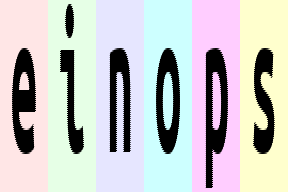

In [53]:
rearrange(ims, "b h (w w2) c -> (h w2) (b w) c", w2=2)

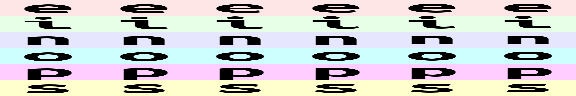

In [61]:
rearrange(ims, "b (h h2) w c -> (b h) (h2 w) c", h2=6)

In [48]:
strips[0].shape

(3, 96, 3)

In [46]:
concatenated_strips.shape

(96, 96, 3)

In [47]:
rearranged.shape

(32, 288, 3)